# SC1015 Project                                                           

## Group members: Bryan, Sean, Wei Jie

### Objective: Find the correlation between risk of heart failure and various factors

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [4]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (918, 12)


In [6]:
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


HeartFailure : 2
1    508
0    410
Name: HeartDisease, dtype: int64


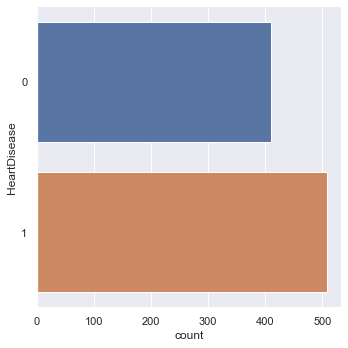

In [8]:
print("HeartFailure :", len(df["HeartDisease"].unique()))
# Get count of people with heart failure ()
print(df["HeartDisease"].value_counts())
sb.catplot(y = "HeartDisease", data = df, kind = "count")

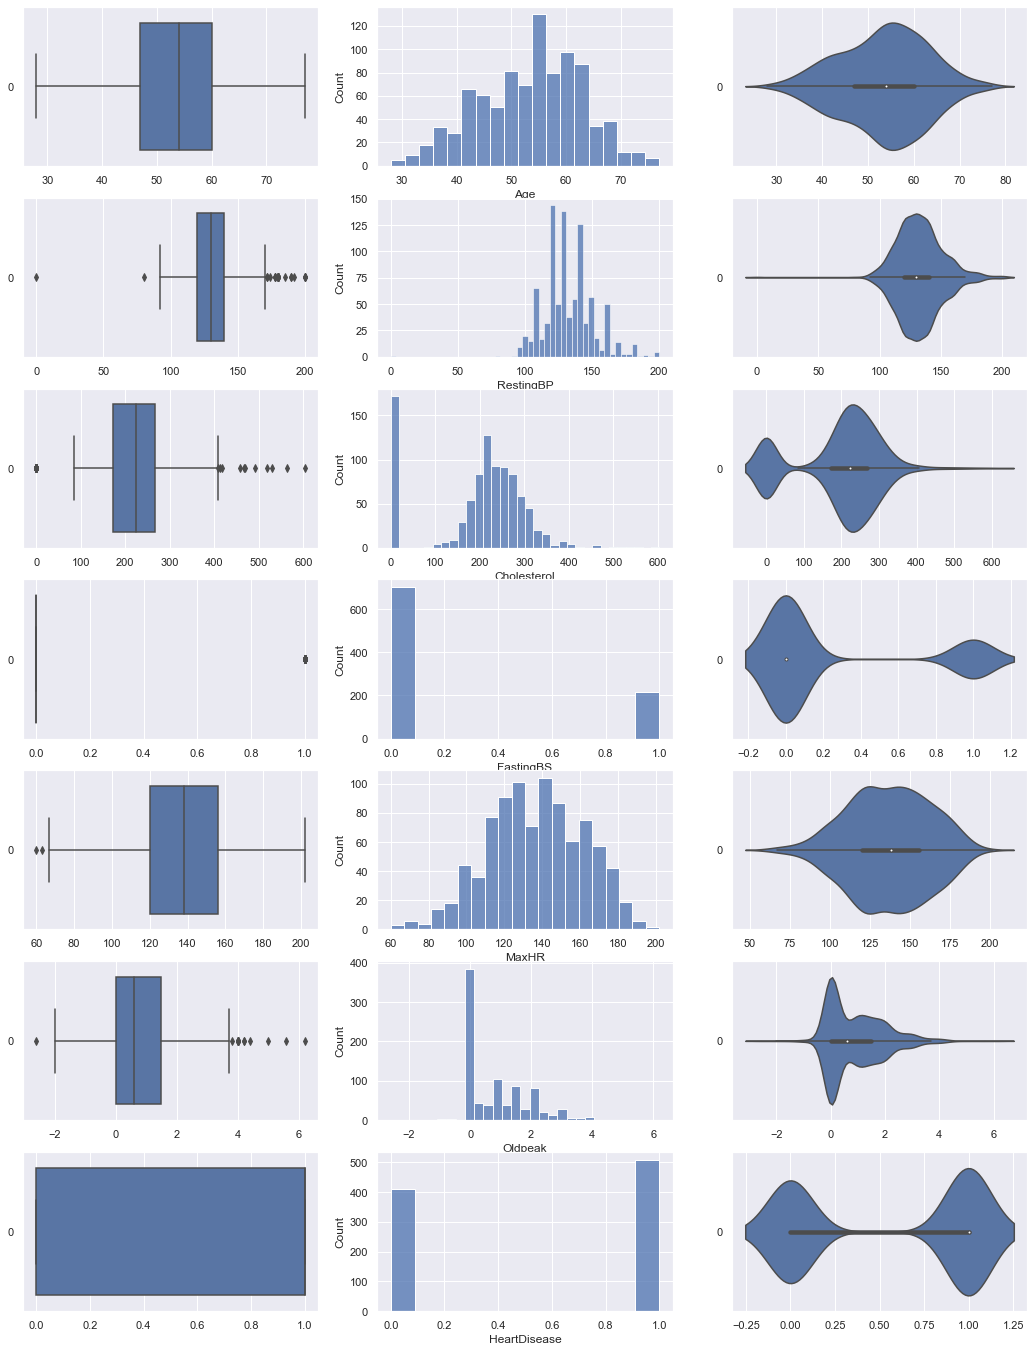

In [20]:
f, axes = plt.subplots(7, 3, figsize=(18, 24))

count = 0
for var in df:
    #Plot for numeric data only
    if df[var].dtypes == np.float64 or df[var].dtypes == np.int64 and not df[var].dtypes:
        sb.boxplot(data = df[var], orient = "h", ax = axes[count,0])
        sb.histplot(data = df[var], ax = axes[count,1])
        sb.violinplot(data = df[var], orient = "h", ax = axes[count,2])
        count += 1

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


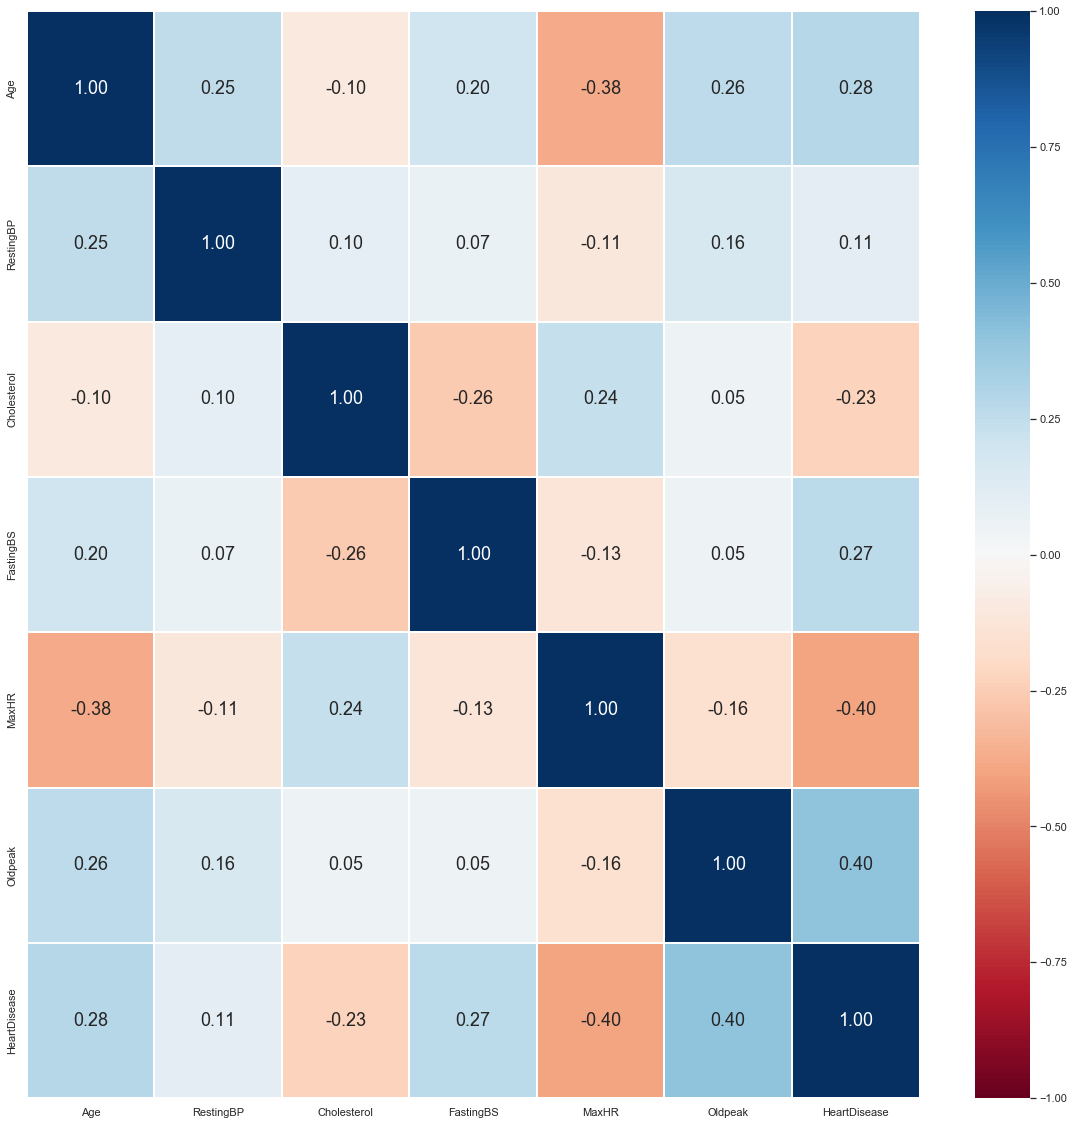

In [21]:
# Correlation Matrix
print(df.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(df.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

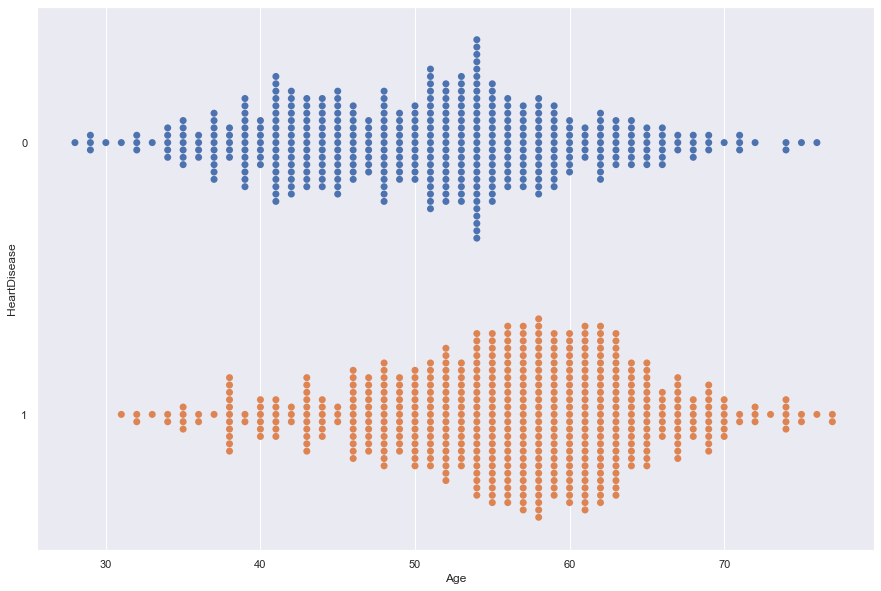

In [48]:
f = plt.figure(figsize=(15, 10))
sb.swarmplot(data=df, x="Age", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

C:\Users\btpy2\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\Users\btpy2\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


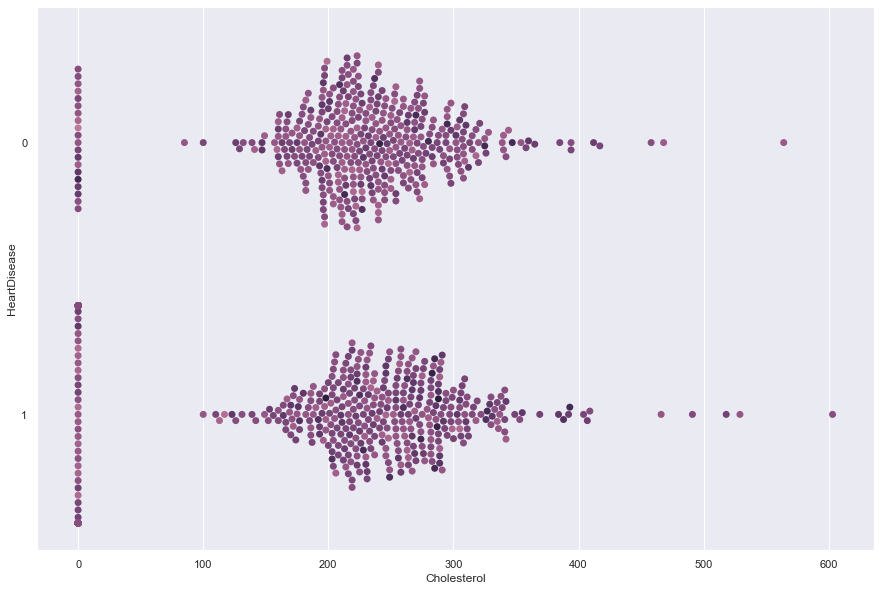

In [60]:
f = plt.figure(figsize=(15, 10))
sb.swarmplot(data=df, x="Cholesterol", y="HeartDisease", hue="RestingBP", orient="h", size=7, legend=False)

C:\Users\btpy2\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\Users\btpy2\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


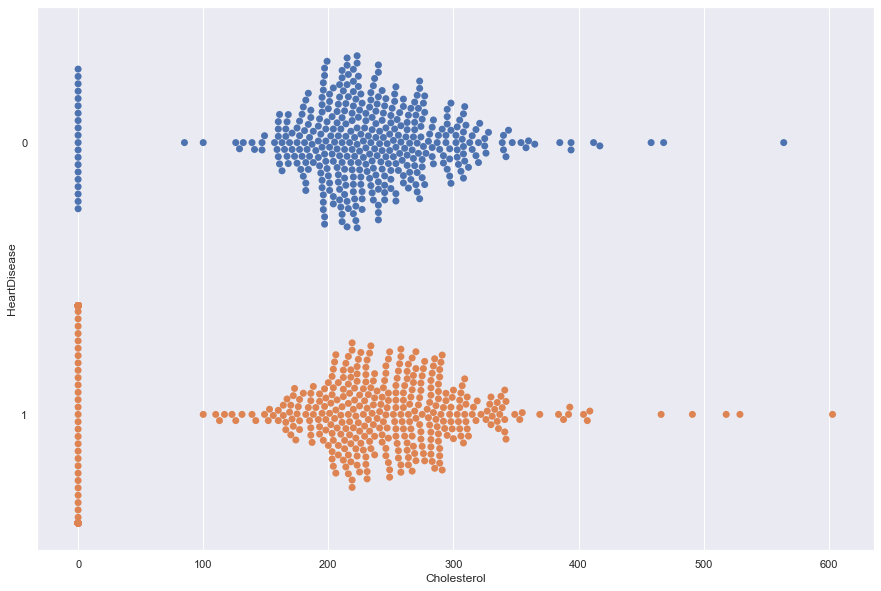

In [55]:
f = plt.figure(figsize=(15, 10))
sb.swarmplot(data=df, x="Cholesterol", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

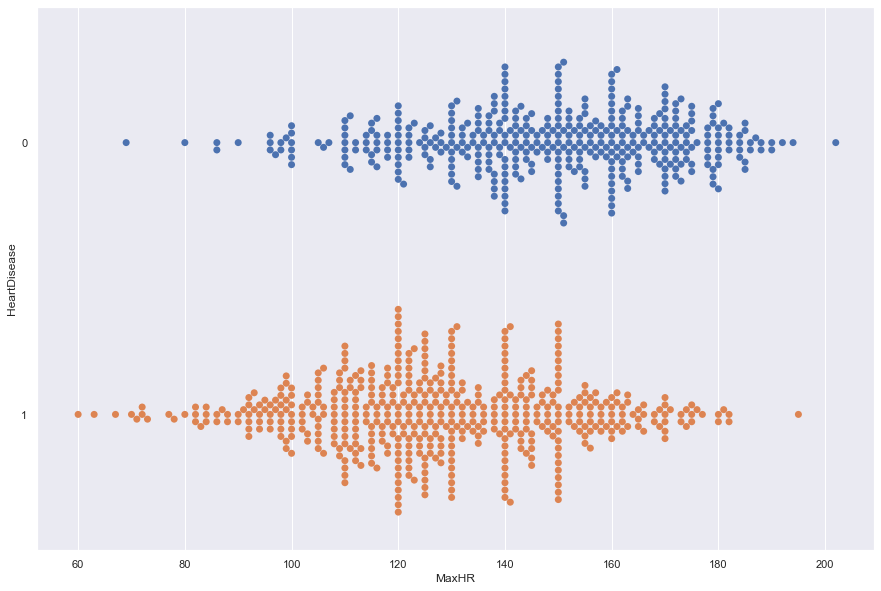

In [61]:
f = plt.figure(figsize=(15, 10))
sb.swarmplot(data=df, x="MaxHR", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)